This dataset includes annual county-level pesticide use estimates for 423 pesticides (active ingredients) applied to agricultural crops grown in the contiguous United States. Two different methods were used to estimate a range of pesticide use for all states except California. Both low and high estimate methods incorporated proprietary surveyed rates for United States Department of Agriculture Crop Reporting Districts, but the estimates differed in how they treated situations when a district was surveyed and pesticide use was not reported. Low estimates assumed zero use in the district for that pesticide; however, high estimates treated the unreported use of pesticides as missing data and estimated the pesticide usage from neighboring locations within the same region.
Data for the state of California was provided by the 2014 Department of Pesticide Regulation Pesticide Use Report. The 2015 report is not yet available.

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
perticide_df=pd.read_csv('2014.csv')

In [3]:
perticide_df.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
0,"2,4-D",2014,1,1,1698.6,1885.5
1,"2,4-D",2014,1,3,7513.6,8472.4
2,"2,4-D",2014,1,5,2613.6,2889.4
3,"2,4-D",2014,1,7,1259.2,1277.7
4,"2,4-D",2014,1,9,7590.5,7756.1


In [4]:
perticide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392433 entries, 0 to 392432
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   COMPOUND       392433 non-null  object 
 1   YEAR           392433 non-null  int64  
 2   STATE_CODE     392433 non-null  int64  
 3   COUNTY_CODE    392433 non-null  int64  
 4   LOW_ESTIMATE   273406 non-null  float64
 5   HIGH_ESTIMATE  392433 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 18.0+ MB


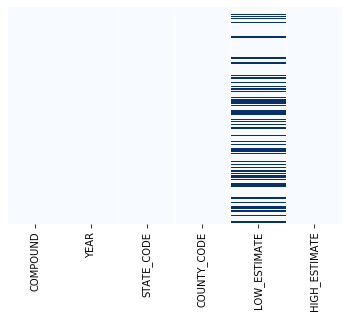

In [10]:
sns.heatmap(perticide_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [11]:
# Fill up the missing data with mean 
perticide_df.loc[(perticide_df['LOW_ESTIMATE'].isnull() == True), 'LOW_ESTIMATE'] = perticide_df['LOW_ESTIMATE'].mean()

In [12]:
perticide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392433 entries, 0 to 392432
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   COMPOUND       392433 non-null  object 
 1   YEAR           392433 non-null  int64  
 2   STATE_CODE     392433 non-null  int64  
 3   COUNTY_CODE    392433 non-null  int64  
 4   LOW_ESTIMATE   392433 non-null  float64
 5   HIGH_ESTIMATE  392433 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 18.0+ MB


In [14]:
perticide_df.describe()

,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
count,392433.0,392433.000000,392433.000000,3.924330e+05,3.924330e+05
mean,2014.0,30.725670,94.597531,1.534195e+03,1.224855e+03
std,0.0,14.774077,85.292216,1.752467e+04,1.777421e+04
min,2014.0,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,2014.0,19.000000,35.000000,3.200000e+00,1.500000e+00
50%,2014.0,29.000000,77.000000,9.650000e+01,1.650000e+01
75%,2014.0,45.000000,129.000000,1.534195e+03,1.416000e+02
max,2014.0,56.000000,810.000000,5.507146e+06,5.507146e+06


In [16]:
all_features=perticide_df[['YEAR','STATE_CODE','COUNTY_CODE','LOW_ESTIMATE']].values

In [17]:
all_classes=perticide_df['HIGH_ESTIMATE'].values


In [18]:
feature_name=['YEAR','STATE_CODE','COUNTY_CODE','LOW_ESTIMATE']

In [19]:
all_features

array([[2.0140e+03, 1.0000e+00, 1.0000e+00, 1.6986e+03],
       [2.0140e+03, 1.0000e+00, 3.0000e+00, 7.5136e+03],
       [2.0140e+03, 1.0000e+00, 5.0000e+00, 2.6136e+03],
       ...,
       [2.0140e+03, 5.5000e+01, 1.3900e+02, 0.0000e+00],
       [2.0140e+03, 5.5000e+01, 1.4100e+02, 5.5000e+00],
       [2.0140e+03, 5.6000e+01, 2.3000e+01, 1.0000e-01]])

In [20]:
from sklearn import preprocessing 

In [21]:
scaler=preprocessing.StandardScaler()
all_features_scaled=scaler.fit_transform(all_features)
all_features_scaled

array([[ 0.        , -2.01201795, -1.09737624,  0.00938134],
       [ 0.        , -2.01201795, -1.07392741,  0.34119976],
       [ 0.        , -2.01201795, -1.05047858,  0.06159353],
       ...,
       [ 0.        ,  1.64303736,  0.52059294, -0.08754501],
       [ 0.        ,  1.64303736,  0.54404177, -0.08723117],
       [ 0.        ,  1.71072357, -0.83943912, -0.08753931]])

In [26]:
# Decision tree
import numpy 
from sklearn.model_selection import train_test_split

In [27]:
numpy.random.seed(1234)

In [28]:
(training_inputs,testing_inputs,training_classes, testing_classes)=train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf=DecisionTreeClassifier(random_state=1)

In [32]:
clf.fit(training_inputs,training_classes)

ValueError: Unknown label type: 'continuous'